In [133]:
import pandas as pd
import numpy as np

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
%matplotlib inline

In [136]:
df = pd.read_csv('BTNvsBB flop strategy comparison.csv')

In [137]:
df

,Flop,IP EV 1/3,IP EV,EV loss (% pot),OOP Equity,IP Equity,Flop suit,Flop type,Paired,High card paired,...,%bottom pair (IP),%underpair (IP),%low pair (IP),%A high (IP),%K high (IP),%combo draw (IP),%flush draw (IP),%OESD (IP),%gutshot (IP),%nothing (IP)
0,As 2s 2d,30.1478,30.8159,0.012147,45.52,54.48,tt,A8-,1,0,...,0.000,0.123,0.000,0.000,0.186,0.006,0.070,0.000,0.017,0.422
1,Jd 3s 2s,30.9719,31.2626,0.005285,46.85,53.15,tt,1BW,0,0,...,0.029,0.076,0.000,0.259,0.144,0.009,0.076,0.005,0.065,0.275
2,9d 4s 2s,31.4646,31.8001,0.006100,46.47,53.53,tt,1BW,0,0,...,0.040,0.044,0.000,0.261,0.145,0.008,0.074,0.005,0.061,0.244
3,8c 5d 2s,31.1091,31.8673,0.013785,46.92,53.08,r,Rags,0,0,...,0.050,0.022,0.000,0.260,0.145,0.000,0.000,0.022,0.082,0.262
4,Ac 6d 2s,31.9954,32.1800,0.003356,45.36,54.64,r,A8-,0,0,...,0.041,0.079,0.000,0.000,0.182,0.000,0.000,0.000,0.023,0.371
5,8c 7d 2s,31.5449,31.9613,0.007571,46.85,53.15,r,Rags,0,0,...,0.072,0.000,0.000,0.262,0.145,0.000,0.000,0.044,0.082,0.251
6,Td 7s 2s,30.9963,31.6546,0.011969,48.09,51.91,tt,1BW,0,0,...,0.073,0.022,0.000,0.262,0.146,0.009,0.067,0.027,0.055,0.239
7,Qs 8d 2s,33.0215,33.3535,0.006036,45.57,54.43,tt,1BW,0,0,...,0.084,0.033,0.000,0.267,0.126,0.006,0.073,0.000,0.084,0.192
8,Jc Td 2s,32.8542,33.0013,0.002675,46.65,53.35,r,2BW+,0,0,...,0.107,0.000,0.000,0.266,0.126,0.000,0.000,0.089,0.129,0.214
9,Ks Td 2s,32.3491,32.5533,0.003713,45.81,54.19,tt,2BW+,0,0,...,0.103,0.022,0.000,0.269,0.000,0.009,0.067,0.028,0.112,0.304


In [138]:
df['tt'] = df.apply(lambda row: 1 if row['Flop suit'] == 'tt' else 0, axis=1)
df['r'] = df.apply(lambda row: 1 if row['Flop suit'] == 'r' else 0, axis=1)
df['m'] = df.apply(lambda row: 1 if row['Flop suit'] == 'm' else 0, axis=1)

df['A9+'] = df.apply(lambda row: 1 if row['Flop type'] == 'AT+' else 0, axis=1)
df['A8-'] = df.apply(lambda row: 1 if row['Flop type'] == 'A9-' else 0, axis=1)
df['2BW+'] = df.apply(lambda row: 1 if row['Flop type'] == '2BW+' else 0, axis=1)
df['1BW'] = df.apply(lambda row: 1 if row['Flop type'] == '1BW' else 0, axis=1)
df['Rags'] = df.apply(lambda row: 1 if row['Flop type'] == 'Rags' else 0, axis=1)

df['Connectedness OOP'] = df.apply(lambda row: row['%gutshot (OOP)'] + 2*row['%OESD (OOP)'], axis=1)
df['Connected'] = df.apply(lambda row: 1 if (row['Connectedness OOP'] >=0.25 ) else 0, axis =1)
df['Connectedness IP'] = df.apply(lambda row: row['%gutshot (IP)'] + 2*row['%OESD (IP)'], axis=1)
df['Connectedness'] = df.apply(lambda  row: (row['Connectedness IP'] + row['Connectedness OOP'])/2, axis=1)
df['Wetness OOP'] = df.apply(lambda row:
                         row['%combo draw (OOP)']+
                         row['%flush draw (OOP)']+
                         row['%OESD (OOP)']+
                         row['%gutshot (OOP)']
                         , axis=1)
df['Wetness IP'] = df.apply(lambda row:
                         row['%combo draw (IP)']+
                         row['%flush draw (IP)']+
                         row['%OESD (IP)']+
                         row['%gutshot (IP)']
                         , axis=1)
df['Wetness'] = df.apply(lambda  row: (row['Wetness IP'] + row['Wetness OOP'])/2, axis=1)

df['unpaired % OOP'] = df.apply(lambda row: row['%A high (OOP)'] + row['%K high (OOP)'] + row['%nothing (OOP)'], axis=1)
df['unpaired % IP'] = df.apply(lambda row: row['%A high (IP)'] + row['%K high (IP)'] + row['%nothing (IP)'], axis=1)

df['Nut advantage IP'] = df.apply(lambda row:
                                  row['%nut hands (IP)'] - row['% nut hands (OOP)']
                                  , axis=1)
df['Top pair advantage IP'] = df.apply(lambda row:
                                  row['%top pair (IP)'] - row['%top pair (OOP)']
                                  , axis=1)

df['pair % OOP'] = df.apply(lambda row:
                            row['%top pair (OOP)']+
                            row['%middle pair (OOP)']+
                            row['%bottom pair (OOP)']+
                            row['%underpair (OOP)']
                           , axis=1)

df['pair % IP'] = df.apply(lambda row:
                            row['%top pair (IP)']+
                            row['%middle pair (IP)']+
                            row['%bottom pair (IP)']+
                            row['%underpair (IP)']
                           , axis=1)

In [139]:
df['Acceptable EV loss'] = df.apply(lambda row: 1 if row['EV loss (% pot)'] <= 0.01 else 0, axis=1)

In [140]:
df.columns

Index(['Flop', 'IP EV 1/3', 'IP EV', 'EV loss (% pot)', 'OOP Equity',
       'IP Equity', 'Flop suit', 'Flop type', 'Paired', 'High card paired',
       '% nut hands (OOP)', '% draws (OOP)', '%straight flush (OOP)',
       '%quads (OOP)', '%fullhouse (OOP)', '%flush (OOP)', '%straight (OOP)',
       '%set (OOP)', '%trips (OOP)', '%two pair (OOP)', '%overpair (OOP)',
       '%top pair (OOP)', '%middle pair (OOP)', '%bottom pair (OOP)',
       '%underpair (OOP)', '%low pair (OOP)', '%A high (OOP)', '%K high (OOP)',
       '%combo draw (OOP)', '%flush draw (OOP)', '%OESD (OOP)',
       '%gutshot (OOP)', '%nothing (OOP)', '%nut hands (IP)', '%draws (IP)',
       '%straight flush (IP)', '%quads (IP)', '%fullhouse (IP)', '%flush (IP)',
       '%straight (IP)', '%set (IP)', '%trips (IP)', '%two pair (IP)',
       '%overpair (IP)', '%top pair (IP)', '%middle pair (IP)',
       '%bottom pair (IP)', '%underpair (IP)', '%low pair (IP)',
       '%A high (IP)', '%K high (IP)', '%combo draw (IP)', '

In [141]:
all_columns = ['OOP Equity','IP Equity', 'Paired', 'High card paired',
       '% nut hands (OOP)', '% draws (OOP)', '%straight flush (OOP)',
       '%quads (OOP)', '%fullhouse (OOP)', '%flush (OOP)', '%straight (OOP)',
       '%set (OOP)', '%trips (OOP)', '%two pair (OOP)', '%overpair (OOP)',
       '%top pair (OOP)', '%middle pair (OOP)', '%bottom pair (OOP)',
       '%underpair (OOP)', '%low pair (OOP)', '%A high (OOP)', '%K high (OOP)',
       '%combo draw (OOP)', '%flush draw (OOP)', '%OESD (OOP)',
       '%gutshot (OOP)', '%nothing (OOP)', '%nut hands (IP)', '%draws (IP)',
       '%straight flush (IP)', '%quads (IP)', '%fullhouse (IP)', '%flush (IP)',
       '%straight (IP)', '%set (IP)', '%trips (IP)', '%two pair (IP)',
       '%overpair (IP)', '%top pair (IP)', '%middle pair (IP)',
       '%bottom pair (IP)', '%underpair (IP)', '%low pair (IP)',
       '%A high (IP)', '%K high (IP)', '%combo draw (IP)', '%flush draw (IP)',
       '%OESD (IP)', '%gutshot (IP)', '%nothing (IP)', 'tt', 'r', 'm', 'A9+',
       'A8-', '2BW+', '1BW', 'Rags', 'Connectedness', 'Wetness',
       'Nut advantage IP', 'Top pair advantage IP', 'pair % OOP', 'unpaired % OOP', 'unpaired % IP', 'Connectedness OOP',
       'Connectedness IP', 'Wetness OOP', 'Wetness IP', 'unpaired % OOP',
       'unpaired % IP', 'pair % IP']
less_columns = ['IP Equity','Paired', 'High card paired','tt', 'r', 'm', 'A9+',
       'A8-', '2BW+', '1BW', 'Rags', 'Connectedness OOP', 'Nut advantage IP', 'Top pair advantage IP', 'pair % OOP', 'unpaired % OOP']
even_less_columns = ['Paired', 'tt', 'r', 'm', 'A9+',
       'A9+', '2BW+', '1BW', 'Rags', 'Connected']
columns_to_use = less_columns
X = df[columns_to_use]
y = df['Acceptable EV loss']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
clf = DecisionTreeClassifier()

In [145]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
IP Equity,0.623180
Nut advantage IP,0.115683
Top pair advantage IP,0.075758
unpaired % OOP,0.068014
m,0.063626
Connectedness OOP,0.053739
Paired,0.000000
High card paired,0.000000
tt,0.000000
r,0.000000


In [147]:
predictions_test = clf.predict(X_test)
predictions_train = clf.predict(X_train)

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [149]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions_test).ravel()
(tn, fp, fn, tp)

(6, 1, 3, 12)

In [150]:
tn, fp, fn, tp = confusion_matrix(y_train,predictions_train).ravel()
(tn, fp, fn, tp)

(22, 0, 0, 28)

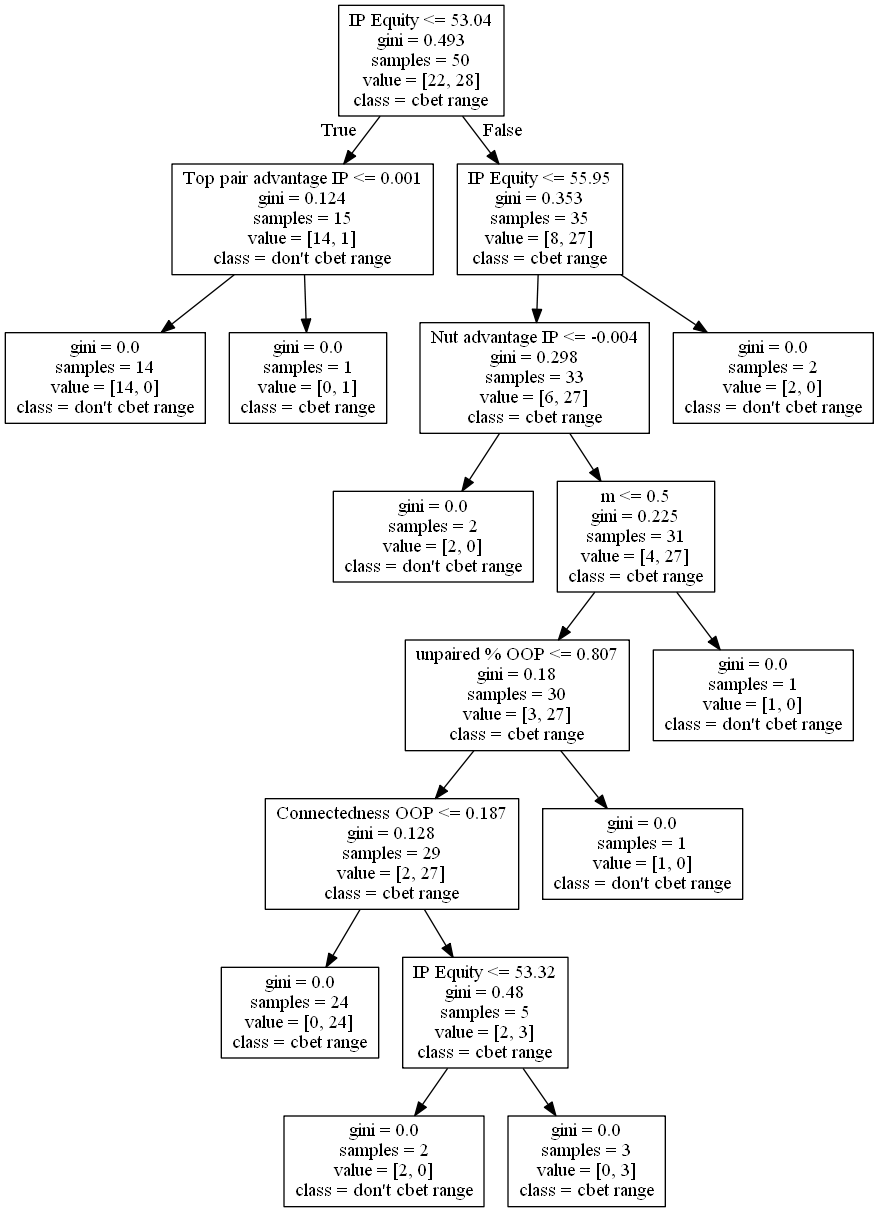

In [151]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

data_class_names = ['don\'t cbet range', 'cbet range']

dot_data = export_graphviz(clf, out_file=None, feature_names=columns_to_use, class_names=data_class_names)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())